# 串起来：让机器人可以简单地玩游戏


In [1]:
from CyClient import *
import time
import numpy as np
from matchUtil import *
from Cut import *
import matplotlib.pyplot as plt
cli = Client()
cli.sayHello()

received:     Hello From Server 


In [2]:
cli.takAction(4,0,0)
time.sleep(0.5)
cli.takAction(3,0,0)

received:     M         4         0         0
received:     M         3         0         0


## test

received: 
600 800 3
30000
0.8303146362304688


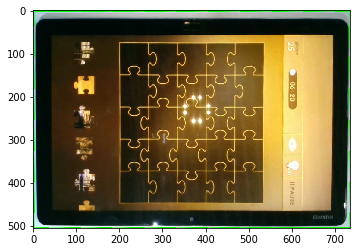

In [16]:
test = cli.getPic()
plt.imshow(test)
cut = get_Contour(test)
plt.imshow(cut)
plt.show()

In [4]:
from matchUtil import *

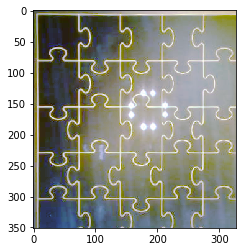

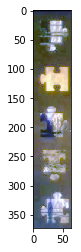

[6, 10]


In [17]:
sor = cutout_source(cut,cut)
plt.imshow(sor)
plt.show()  
#s_x = int(sor.shape[0]/5)
#s_y = int(sor.shape[1]/5)
    
temp_area = cutout_template_area(cut,cut)
plt.imshow(temp_area)
plt.show()
temp_pos = []
temp = cutout_template(cut,cut,temp_pos)
#temp_pos
plt.imshow(temp)
print(temp_pos)

In [18]:
template = cut
print(temp_pos)
imgshape = template.shape
print(imgshape)
#PHONESIZE = (155,235)
diviceShape = (155,235)
temp_pos_1 = (temp_pos[0]+20 + template.shape[1]*0.114 , temp_pos[1] +25+ template.shape[0]*0.111)
print(temp_pos_1)
x,y =temp_pos_1
#1,0,0,1
x =  (1-x/imgshape[1]) * diviceShape[1] # because x is converted
y =  y/imgshape[0] * diviceShape[0]
print(x+10,y+10)

[6, 10]
(505, 735, 3)
(109.79, 91.055)
209.89707482993197 37.94757425742574


In [58]:
x,y = temp_pos_1
(1-x/imgshape[1])*

0.8352455418381344

In [14]:
cli.takAction(1,int(x),int(y))

received:     M         1         1 2 5         1 3 7


In [52]:
cli.takAction(1,110,210)

received:     M         1         1 1 0         2 1 0


received: 
600 800 3
30000
0.145050048828125


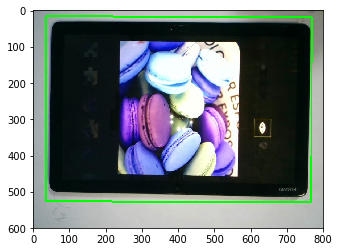

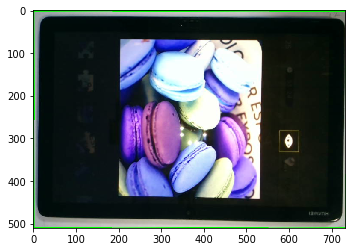

In [4]:
test = cli.getPic()
#plt.imshow(test)
#cv2.imwrite
cut = get_Contour(test)
plt.imshow(test)
plt.show()
#cv2.imwrite("cut_pad.png",cut)
plt.imshow(cut)
plt.show()

In [19]:
cli.takAction(1,10,10)

received:     M         1         1 0         1 0


In [20]:
cli.takAction(1,165,10)

received:     M         1         1 6 5         1 0


In [21]:
cli.takAction(1,10,245)

received:     M         1         1 0         2 4 5


In [22]:
cli.getPos() # left upper corner  it is 85, 10, 0, right bottom corner is 15 -135 
'''
base
base = 10 10
pad:left upper corner is 165,10 ,right bottom corner is 15,245,
'''


received: 
(10.0, 245.0, 0)


'\nbase\nbase = 10 10\npad:left upper corner is 165,10 ,right bottom corner is 15,245,\n'

In [23]:
PHONESIZE = (150,235)


In [33]:
cli.getPos()[0]

received: 
(0.0, 0.0, 0)


0.0

In [40]:
class Player:
    def __init__(self,cli):
        self.cli = cli
        self.basePoint = np.array([0,0])
        self.sourceimg = None # the image of the jagsaw to recover
        self.emptyimg = None # the image of the empty target area 
    def setBase(self):
        # move to where 0,0 point should be in the figure
        curr = self.cli.getPos()
        print("current position: ", curr[:2])
        self.basePoint = np.array(curr[:2])
    def moveto(self,x,y):
        x += self.basePoint[0]
        y += self.basePoint[1]
        x,y = int(x),int(y)
        self.cli.takAction(1,x,y)
        curpos =self.cli.getPos() 
        while((curpos[0]-x)**2 + (curpos[1]-y)**2 >= 1 ):
            time.sleep(0.1)
            curpos = self.cli.getPos()
        
        
    def movetoImg(self,x,y,imgshape,diviceShape = PHONESIZE):
        # imgshape is (y_shape, x_shape)
        '''
        x =  (1-x/imgshape[1]) * diviceShape[0] # because x is converted
        y =  y/imgshape[0] * diviceShape[1]
        '''
        x =  (1-x/imgshape[1]) * diviceShape[1] # because x is converted
        y =  y/imgshape[0] * diviceShape[0]
        x,y = y,x
        self.moveto(x,y)
    
    def retreat(self):
        #self.moveto(-10,-10)
        self.moveto(-10,-10)
#         self.cli.takAction(3,0,0)
    
    def clickAtImg(self, x, y,imgshape,diviceShape = PHONESIZE):
        print(imgshape,diviceShape)
        self.movetoImg(x, y,imgshape,diviceShape)
        time.sleep(2)
#         self.cli.takAction(2,0,0)
        self.cli.takAction(4,0,0)
        time.sleep(0.5)
        self.cli.takAction(3,0,0)
        self.retreat()
    
    def dragAtImg(self, x0,y0,x1,y1,imgshape,diviceShape = PHONESIZE):
        self.movetoImg(x0,y0,imgshape,diviceShape)
        self.cli.takAction(4,0,0)
        self.movetoImg(x1,y1,imgshape,diviceShape)
        self.cli.takAction(3,0,0)
    
    def tryOneDrag(self,x0,y0,x1,y1,imgshape,diviceShape = PHONESIZE):
        # drag the piece to the position and then drag it back
        # if it is the correct piece it will stay there
        self.dragAtImg(x0,y0,x1,y1,imgshape,diviceShape = PHONESIZE)
        time.sleep(2)
        #self.dragAtImg(x1,y1+30,x0,y0-30,imgshape,diviceShape = PHONESIZE)
        self.dragAtImg(x1,y1,x0-30,y0-30,imgshape,diviceShape = PHONESIZE)
        self.retreat()
        
    def getOneShot(self):
        img = self.cli.getPic()
        img = get_Contour(img)
        return img
    
    def initGame(self):
        # The phone should be before the game start
        self.retreat()
        img = self.getOneShot()
        #source ?
        self.sourceimg = img
        y,x = img.shape[:2]
        #x,y = x*0.502,y*0.237
        x,y = x*0.4,y*0.16
        self.clickAtImg(x,y,img.shape[:2])
        time.sleep(3)
        img = self.getOneShot()
        self.emptyimg = cutout_target(img)
        plt.imshow(self.sourceimg)
        plt.show()
        plt.imshow(self.emptyimg)
        plt.show()
               
        
        
ply = Player(cli)

In [41]:
cli.takAction(1,10,10)

received:     M         1         1 0         1 0


In [42]:
ply.setBase()

received: 
(10.0, 10.0, 0)
current position:  (10.0, 10.0)


In [43]:
ply.retreat()

received:     M         1         0         0
received: 
(0.0, 0.0, 0)


received:     M         1         0         0
received: 
(0.0, 0.0, 0)
received: 
600 800 3
30000
0.879150390625
(494, 751) (150, 235)
received:     M         1         3 4         1 5 1
received: 
(34.0, 151.0, 0)
received:     M         4         0         0
received:     M         3         0         0
received:     M         1         0         0
received: 
(0.0, 0.0, 0)
received: 
600 800 3
30000
0.9391937255859375


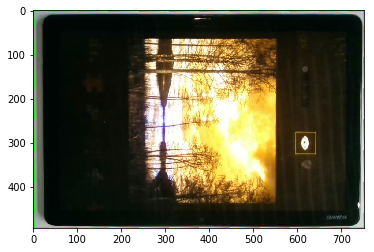

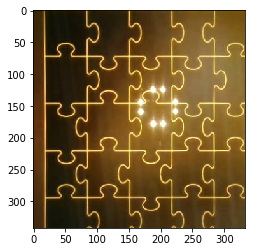

In [44]:
ply.initGame()

In [35]:
#ply.tryOneDrag(100,40, 300,100,ply.sourceimg.shape[:2])
ply.tryOneDrag(430,440, 420,200,ply.sourceimg.shape[:2])
#cli.takAction(1,45,10)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
ply.sourceimg.shape[:2]

In [26]:
ply.movetoImg(50,0, [50,100] , [70,145] )

received:     M         1         3 5         0


In [62]:
from matchUtil import *

received: 
600 800 3
30000
0.8769073486328125
114.38600000000001 66.612


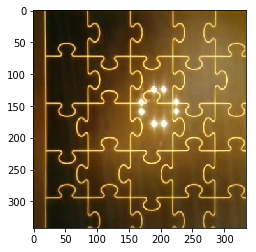

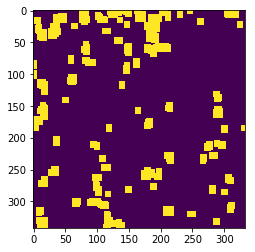

[[ 78.29545455  72.84090909 132.32954545  45.73863636  25.96590909]
 [ 48.57954545  19.48863636  34.375        0.           6.30681818]
 [ 48.92045455   6.81818182  18.69318182  10.51136364  32.04545455]
 [ 28.18181818  37.89772727  29.03409091  21.25        53.125     ]
 [ 35.          75.73863636  19.71590909  23.40909091  34.20454545]]
possible: [[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
scores: [[ 3946719.75418288  5011012.34667287  5971564.8842547   2542788.46912066
   6364802.63339199]
 [ 3247460.3977973   3864055.15724754  7367741.42789025  6302460.07318577
   4776992.93816868]
 [ 5268056.72136079  1198545.60543849  3806044.90487089  3546031.47996505
   3358759.52819117]
 [ 4821806.93843759  5080804.32997014  7850948.5193558   4569161.67513112
   4899959.21866142]
 [ 5288371.05643952 10407330.82558123  6677469.28290159  6484711.64418685
  10744755.41282261]]

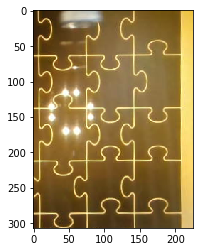

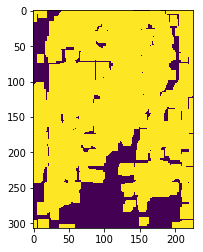

[[142.31693989 249.14754098 246.82513661 245.89617486 223.13661202]
 [169.16393443 244.96721311 249.14754098 253.8852459  206.87978142]
 [248.77595628 247.47540984 252.30601093 235.0273224  238.3715847 ]
 [241.99453552 227.50273224 119.27868852 208.27322404 225.08743169]
 [158.48087432  60.56830601  28.24043716 135.53551913 139.71584699]]


In [45]:
def playOneStep(ply):
    img = ply.getOneShot()
    target = cutout_target(img)
    (x0,y0), scores = matching(ply.sourceimg,img.copy(),mode = "match")
    print(x0,y0)
    #应该还需要10-20的调整
    #为什么有时候会出现不停止直接走然后图像出现异常的情况
    sor = cutout_source(ply.sourceimg,img)
    
    plt.imshow(target)
    plt.show()
    possible = findEmpty(ply.emptyimg,target,mode = "debug")
    initial_num = possible.sum()
    print("possible:", possible)
    print("scores:",scores)
    while(possible.sum()>0):
        y = np.argmax(scores)//5 # x => i 
        x = np.argmax(scores)%5
        print(x,y)
        scores[y][x]=-1
        if(not possible[x][y]):
            continue
        possible[x][y] = False
        # add the source area margine
        x = int(x*sor.shape[1]/5)
        y = int(y*sor.shape[0]/5)
        x += int(ply.sourceimg.shape[1]*0.264)
        y += int(ply.sourceimg.shape[0]*0.138)
        ply.tryOneDrag(x0,y0,x,y,img.shape[:2])
        time.sleep(5)
        timg = ply.getOneShot()
        timg = cutout_target(timg)
        
        plt.imshow(timg)
        plt.show()
        empty = findEmpty(ply.emptyimg,timg,mode = "debug")
        
        if(empty.sum()<initial_num):
            break
playOneStep(ply)

In [ ]:
plt.imshow(ply.sourceimage)